# Lista 2

In [1]:
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import t

In [2]:
def oblicz_regresje(x, y):
    # Obliczenie współczynnika b1
    b1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
    # Obliczenie współczynnika b0
    b0 = np.mean(y) - b1 * np.mean(x)
    return b0, b1

## zadanie 1

In [3]:
def var_b1(x, v):
    x_mean = np.mean(x)
    return v/(v-2)*1/(sum((xi - x_mean)**2 for xi in x))

In [4]:
def var_b0(x, v):
    x_mean = np.mean(x)
    n = len(x)
    return v/(v-2)*(1/n + x_mean**2 * 1/(sum((xi - x_mean)**2 for xi in x)))

In [8]:
def b1_emp(x,y):
    return np.sum((x - np.mean(x)) * (y))/np.sum((x-np.mean(x))**2)

def b0_emp(x,y):
    return np.mean(y) - b1_emp(x,y) * np.mean(x)

In [24]:
vv = [3,4,5,10,15,25] 
sig = [1.0, 3.0, 7.0] 
b0_true = 2.0
b1_true = 4.0
n = 1000
M1 = 200
M2 = 100
b0s = {}
b1s = {}

x = np.linspace(0, 10, n)
errorsb0 = {}
errorsb1 = {}
errorsvarb0 = {}
errorsvarb1 = {}
# errorsEb0 = {}
# errorsEb1 = {}
for v in vv:
    errorsvarb0[v] = []
    errorsvarb1[v] = []
    errorsb0[v] = []
    errorsb1[v] = []
    for i in range(M2):
        b0emp = {}
        b1emp = {}
        b0s[v] = [] 
        b1s[v] = []  
        b0emp[v] = [] 
        b1emp[v] = [] 
        for _ in range(M1):
            # krok 2
            epst = t.rvs(v, size=n)
            y = b0_true + b1_true * x + epst
            # krok 3
            b0, b1 = oblicz_regresje(x, y)
            b0emp[v].append(b0)
            b1emp[v].append(b1)
        # b0s[v].append(var_b0(x, v))
        # b1s[v].append(var_b1(x, v))
        errorsb0[v].append(np.abs(b0_true - np.mean(b0emp[v])))
        errorsb1[v].append(np.abs(b1_true - np.mean(b1emp[v])))
        errorsvarb0[v].append(np.abs(var_b0(x, v) - np.var(b0emp[v])))
        errorsvarb1[v].append(np.abs(var_b1(x, v) - np.var(b1emp[v])))

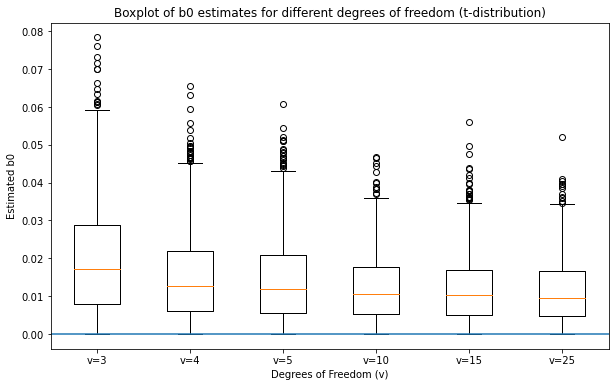

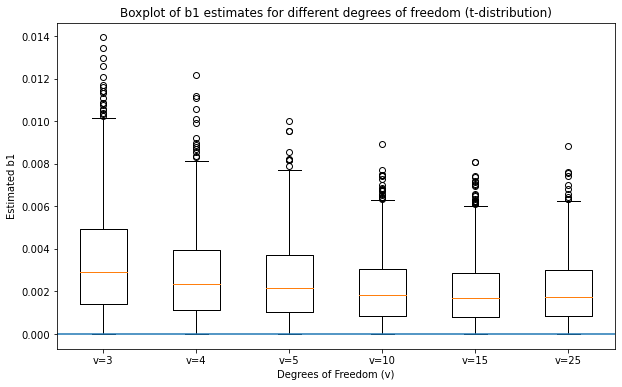

In [22]:
plt.figure(figsize=(10, 6))
plt.boxplot(errorsb0.values(), labels=[f'v={v}' for v in vv])
plt.axhline(y = 0)
plt.title('Boxplot of b0 estimates for different degrees of freedom (t-distribution)')
plt.xlabel('Degrees of Freedom (v)')
plt.ylabel('Estimated b0')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(errorsb1.values(), labels=[f'v={v}' for v in vv])
plt.axhline(y = 0)
plt.title('Boxplot of b1 estimates for different degrees of freedom (t-distribution)')
plt.xlabel('Degrees of Freedom (v)')
plt.ylabel('Estimated b1')
plt.show()

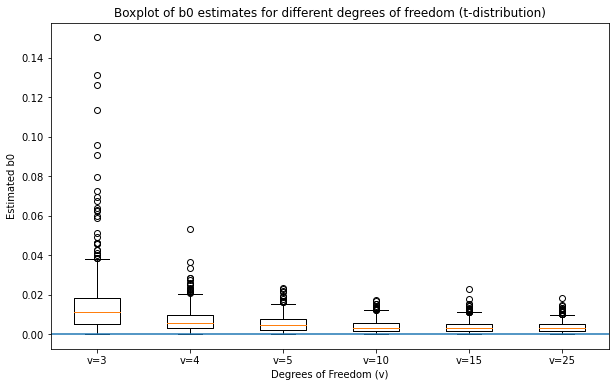

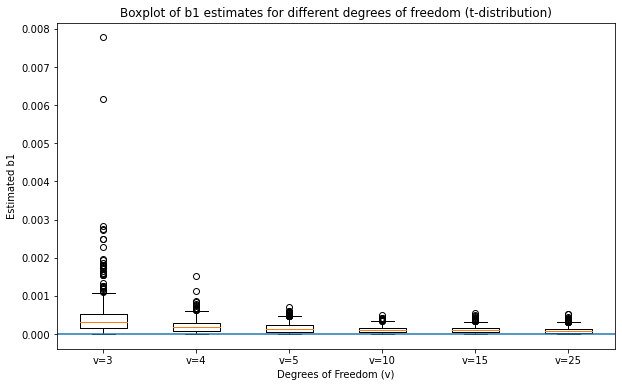

In [23]:
plt.figure(figsize=(10, 6))
plt.boxplot(errorsvarb0.values(), labels=[f'v={v}' for v in vv])
plt.axhline(y = 0)
plt.title('Boxplot of b0 estimates for different degrees of freedom (t-distribution)')
plt.xlabel('Degrees of Freedom (v)')
plt.ylabel('Estimated b0')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(errorsvarb1.values(), labels=[f'v={v}' for v in vv])
plt.axhline(y = 0)
plt.title('Boxplot of b1 estimates for different degrees of freedom (t-distribution)')
plt.xlabel('Degrees of Freedom (v)')
plt.ylabel('Estimated b1')
plt.show()

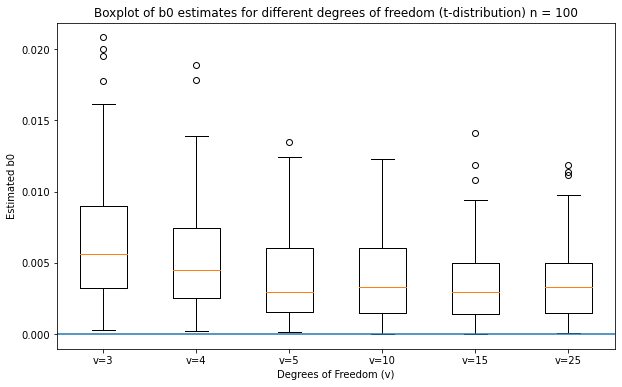

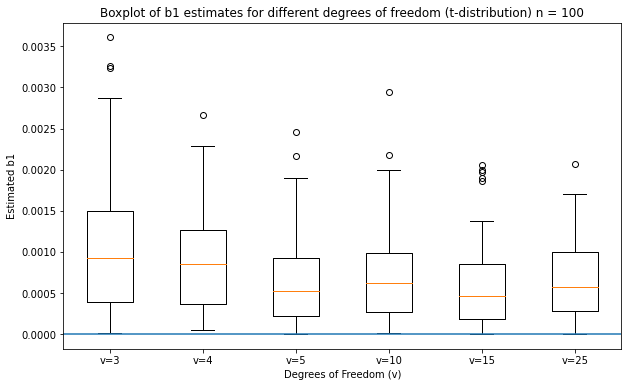

In [25]:
plt.figure(figsize=(10, 6))
plt.boxplot(errorsb0.values(), labels=[f'v={v}' for v in vv])
plt.axhline(y = 0)
plt.title('Boxplot of b0 estimates for different degrees of freedom (t-distribution) n = 100')
plt.xlabel('Degrees of Freedom (v)')
plt.ylabel('Estimated b0')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(errorsb1.values(), labels=[f'v={v}' for v in vv])
plt.axhline(y = 0)
plt.title('Boxplot of b1 estimates for different degrees of freedom (t-distribution) n = 100')
plt.xlabel('Degrees of Freedom (v)')
plt.ylabel('Estimated b1')
plt.show()

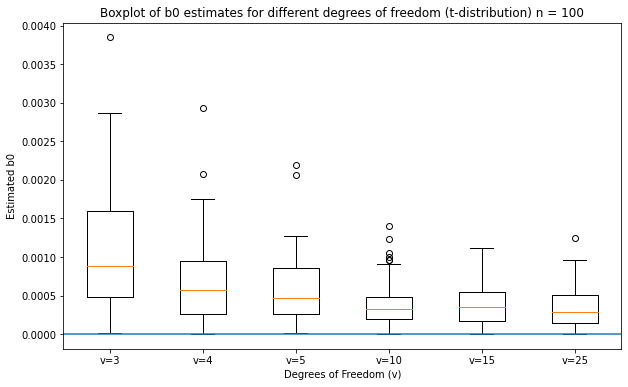

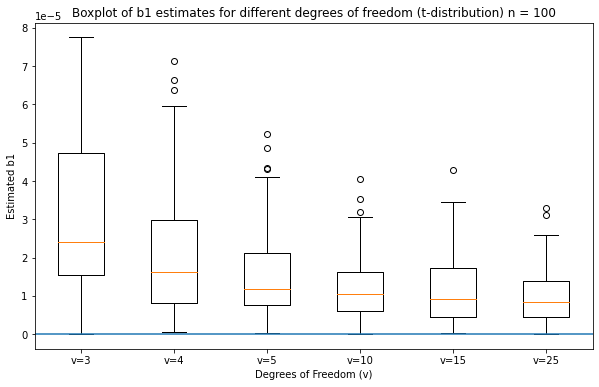

In [26]:
plt.figure(figsize=(10, 6))
plt.boxplot(errorsvarb0.values(), labels=[f'v={v}' for v in vv])
plt.axhline(y = 0)
plt.title('Boxplot of b0 estimates for different degrees of freedom (t-distribution) n = 100')
plt.xlabel('Degrees of Freedom (v)')
plt.ylabel('Estimated b0')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(errorsvarb1.values(), labels=[f'v={v}' for v in vv])
plt.axhline(y = 0)
plt.title('Boxplot of b1 estimates for different degrees of freedom (t-distribution) n = 100')
plt.xlabel('Degrees of Freedom (v)')
plt.ylabel('Estimated b1')
plt.show()

In [6]:
for v in vv:
    print(f"Stopnie swobody (v={v}):")
    print("    wariancja b0 ze wzoru:", var_b0(y, v))  
    print(f"  Wariancja estymatora b0: {np.var(b0s[v])}")
    print("    wariancja b1 ze wzoru:", var_b1(y, v))
    print(f"  Wariancja estymatora b1: {np.var(b1s[v])}")

Stopnie swobody (v=3):
    wariancja b0 ze wzoru: 0.1408225897262313
  Wariancja estymatora b0: 0.09920341528512804
    wariancja b1 ze wzoru: 0.0003947467935413183
  Wariancja estymatora b1: 0.0027058717857425664
Stopnie swobody (v=5):
    wariancja b0 ze wzoru: 0.0782347720701285
  Wariancja estymatora b0: 0.07057249464890444
    wariancja b1 ze wzoru: 0.0002193037741896213
  Wariancja estymatora b1: 0.0019221507840644658
Stopnie swobody (v=7):
    wariancja b0 ze wzoru: 0.06571720853890793
  Wariancja estymatora b0: 0.05053859569460358
    wariancja b1 ze wzoru: 0.00018421517031928187
  Wariancja estymatora b1: 0.0016514158416772607


In [7]:
np.var(b0s[vv[0]])
    # epsn = np.random.normal(0, sigma, n)

0.09920341528512804